## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset
df = pd.read_csv('ab_data.csv')

#show the 5 lines of the set
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#The number of rows in the dataset.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#The number of unique user_ids in the dataset.
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [5]:
#We take the value_counts of the converted column from the dataset to count all unique values.
#Then use the normalize parameter to equal True so we have a relative frequencies of each value instead of a list.
#Then multiply by a 100 so we have a valid percentage of users for each value from the column.
df['converted'].value_counts(normalize=True)*100

0    88.034081
1    11.965919
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#X is the variable where group equals treatment and landing page does not equal to new_page.
#Y is the variable where group does not equal treatment and landing pafe does equal to new_page.

X = df.query('group == "treatment" & landing_page != "new_page"')
Y = df.query('group != "treatment" & landing_page == "new_page"')

#Calculating the numbers of times new_page and treatment don't match.
len(X) + len(Y)

3893

f. Do any of the rows have missing values?

In [7]:
#This information on the dataset shows we have a total of 294478 entries and the same number is displayed in each column indicating we have no null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Removing mismatches from the dataset.
df1 = df.drop(df[(df.group == 'treatment') & (df.landing_page != 'new_page')].index)
df2 = df1.drop(df1[(df.group == 'control') & (df1.landing_page != 'old_page')].index)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Numnber of unique user_ids from df2.
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Info on the repeated user_id from df2.
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

The repeat user_id is in row 1899 and 2893.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
#Remove one of the row of the duplicated user_id from the dataset df2.
df2.drop(labels=2893, inplace= True)

In [13]:
#Verifying that the entry has been removed, number of entries went from 290585 to 290584 so repeated user has been removed.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Mean of the converted column from the dataset.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Information mentioned above where we see 0.118808 probability that someone from the treatment group converted. 

d. What is the probability that an individual received the new page?

In [17]:
#To calculate probability, we to know the number of indivduals that received new page divded by the number of individuals that are in the column landing page.
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

No, there is not enough sufficient evidence to conclude that the new treatment page leads to more conversions among individuals in the dataset. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: The conversion rate of the old_page is the same or greater than the conversion rate of the new_page.

Alternate Hypothesis: The conversion rate of the new_page is greater than the conversion rate of the old_page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#Probabilty of converison rate for both the new_page and old_page are to be considered as equal.
#First, I will be setting up a variable named p_new to assign it with the mean of the converted column from the dataset (df2).
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
#Second, I will be setting up a variable named p_old to assign it with the mean of the converted column again from the dataset (df2).
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#Creating a variable named n_new to the number of individuals that did receive the new page from the dataset.
n_new = len(df2.query('landing_page == "new_page"'))

n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#Creating a variable named n_old to the number of individuals that did not receive the new page from the dataset.
n_old = len(df2.query('landing_page != "new_page"'))

n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Assigning the variable to np.random.binomial so the code can draw samples from a binomial distribution. 
#The n is set to 1 so only 1s and 0s are accounted for, p for probability is set to the probability of new pages and the size is set to the number of users that receive the new_page.
new_page_converted = np.random.binomial(1,p_new,n_new)

new_page_converted.mean()

0.11878741999862363

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Assigning the variable to np.random.binomial and in this case n is set to 1 so only 1s and 0s are accounted for.
#Then, I set the p here to the probability of old pages received and the size is set to the number of users that do not receive the new page.
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11983562096452222

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#Without the mean of the variables in the code, there is a value error that occurs due to the size difference.
#Using the mean for both variables will allow the code to run so we have a set number.
new_page_converted.mean() - old_page_converted.mean()

-0.0010482009658985825

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#Run the simulation 10000 times
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

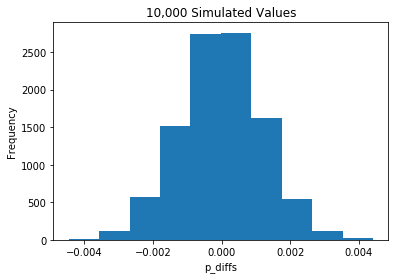

In [26]:
#converting to numpy array
p_diffs = np.array(p_diffs)

#Plotting the histogram & Labeling the x & y-axis
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('10,000 Simulated Values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
control_group = df2.query('group == "control"')
treatment_group = df2.query('group == "treatment"')

#Observed difference
obs_diff = control_group.converted.mean() - treatment_group.converted.mean()
obs_diff

0.0015782389853555567

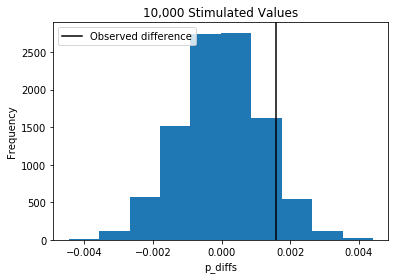

In [28]:
# plot line for observed statistic
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='black', label="Observed difference")
plt.xlabel('p_diffs') #Labeling the x-axis as p_diffs
plt.ylabel('Frequency') #Labeling the y-axis as Frequency
plt.title('10,000 Stimulated Values'); #Give the histogram a title.
plt.legend() #To show the label of the green line named Observed difference.
plt.show()

In [29]:
#Calculating the proportion where probability of differences (p_diffs) is greater than the observed difference.
#Creating a actual difference observed in the ab data csv file where we are first getting the average of the converted and group column using the mean of their groupby.
#Then, creating another variable from the actual difference average variable where we are subtracting the first index with the zero index.
avg = df2['converted'].groupby(df2["group"]).mean()
act_diff = avg[1] - avg[0]


#Proportion of the p_diffs are greater than the actual difference observed
(p_diffs > act_diff).mean()

0.90380000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

90.4% is the proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv.This value computed is called the p-value. The p-value determines how significant the results are from the hypothesis test. If we have a small value such p-value <= 0.05 than we can conclude we have strong evidence to reject the null hypothesis in the test. Here, we have the p-value listed as 0.905 so we can conclude that we accept the null hypothesis set for this test which was the conversion rate of the old page is the same or greater than the conversion rate of the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
n_new = len(df2.query('landing_page == "new_page"'))
n_old = len(df2.query('landing_page == "old_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
#I set the count to equal as the number of conversions for both the old and new page. Then, I set the nobs as number of rows associated with the old and new pages.

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)

z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [32]:
# importing scipy & norm library.
from scipy.stats import norm

# using the normal cumulative distribution function.
norm.cdf(z_score)

0.90505831275902449

In [33]:
# calculating the critical value for z-test.
critical_value = norm.ppf(1-(0.05/2))

critical_value

1.959963984540054

In [34]:
#Seeing the test result.
test_result = (z_score > critical_value)

test_result

False

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value computed from the previous quetion concluded that one does not reject the Null. The Null is set as the conversion of the old_page is greater or the same as the conversion of the new_page and with the p-value being very above 0.05 than we can expect that 95% confidence interval will not be significant enough to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Each row is bound to either a conversion or no conversion and cannot be any possible value other than that so this will be a logistic regression. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept']=1
df2.rename(columns = {'treatment':'ab_page'}, inplace=True)

In [36]:
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

In [37]:
df2.drop('control', axis=1)


df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
import statsmodels.api as sm

lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)

results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        19:10:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

Summary of the Logistic Regression Model is computed above.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value is 0.19 that is associated with ab_page. 

The p-value here differs from the p-value from Part II since in that section we have a different set of null and alternate hypotheses than Part III. In Part II, we had a p-value of 0.905 indictating strongly we have to accept the set null hypothesis. In Part III, we have a p-value of 0.19 which is not as strong of an indictator as in Part II but strong enough to accept the null hypothesis again. In Part II, the null hypothesis is the conversion rate of the new page is less or equal to the conversion rate of the old page while the alternate hypothesis is the conversion rate of the new page is greater than the old page. In Part III, the null hypothesis and alternate hypothesis is to see if the conversion rate between both pages is equal or not. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Yes, there can be other influences deciding whether or not someone converts. The reason why this is a good idea is understanding how data is being created in the test will allow someone to design the test to better understand the factors in the users' decision to convert or not. This will make a more reliable tests so we have the most accurate data resulting from testing. Some disadvantages of adding more terms into the model will be the test will become more complex. In doing so, the testing will require a larger sample size so results appear balanced and not by chance. In conclusion, it will add up on the work load for each additional term added to the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#Read countries.csv
countries_file = pd.read_csv('countries.csv')
countries_file.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
#Seeing how many countries are being listed from the csv file 
countries_file['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
#Creating new dataset with primary key being user id from the countries file and df2.
df_new = countries_file.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [43]:
#Creating dummy variable column for US and CA.
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])

In [44]:
#Dropping one dummy variable from the columns
df3 = df_new.drop(['control','UK'], axis=1)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
#Logistic Regression Model with Canada & US
lm_new = sm.Logit(df3['converted'],df3[['intercept','ab_page','CA','US']])
results = lm_new.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        19:10:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

After reviewing the logit regression model results, I can see that users from the United States are very much more likely to convert than users from Canada. United States users have a p-value of 0.457 while Canada has a p-value of 0.074. 

Conclusion:

1) The Null Hypothesis is accepted and we rejected the alternate hypothesis where the new page conversion rate is greater than the old page.

2) Countries do impact how often users are converting so we do need to understand that other influences can impact the user's decision to convert or not.

3) We do not have enough evidence to support the alternate hypothesis where the new page is performing better with the website users so to avoid additional costs, the company should keep the old page running on their site.    

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0